In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# *Curve Fitting (Local Minimizer)*

## scipy.optimize.curve_fit
> p_res, p_covar = scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, **kwargs)

In [2]:
from scipy.optimize import curve_fit as fitcurve

Real values: [10, 2, -0.5, -0.1]
Fit  values: [ 11.09535979   1.78526106  -0.52171101  -0.19990177]
with  erros: [ 0.90185276  0.18197172  0.15987703  0.38191443]


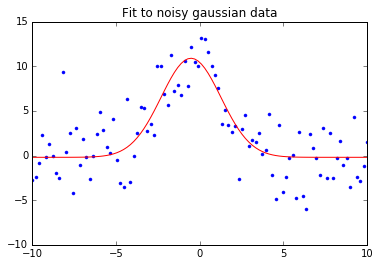

In [19]:
# Definition of model function: gaussian
def gaussian_function(x,amp,sigma,x0,offset):
    return amp * np.exp( - (x-x0)**2 / (2*sigma**2) ) + offset

# Generate noisy data
params = [10,2,-0.5,-0.1]
xdata = np.linspace(-10,10,100)
ydata = gaussian_function(xdata,*params) + np.random.normal(loc=0,scale=3,size=xdata.shape)

# Fitting data 
params_fit, params_covar = fitcurve(gaussian_function,xdata,ydata,p0=params)
params_var = np.sqrt(np.diag(params_covar))
yfit = gaussian_function(xdata,*params_fit)

# Display results
plt.plot(xdata,ydata,'.')
plt.plot(xdata,yfit,'r-')
plt.title('Fit to noisy gaussian data')

print('Real values:',params)
print('Fit  values:',params_fit)
print('with  erros:',params_var)

In [15]:
# WRONG WAY!!
# Definition of model function: gaussian
def gaussian_function(x,A):
    return A[0] * np.exp( - (x-A[2])**2 / (2*A[1]**2) ) + A[3]

# Generating data
params = [10,2,-0.5,-0.1]
xdata = np.linspace(-10,10,200)
ydata = gaussian_function(xdata,params) + np.random.normal(loc=0,scale=0.5,size=xdata.shape)

# Fitting data 
#params_res, params_covar = fitcurve(gaussian_function,xdata,ydata,p0=params)
#params_var = np.sqrt(np.diag(params_covar))
#yfit = gaussian_function(xdata,params_res)

## scipy.optimize.leastsq (legacy, use least_squares instead)
> [x, cov_x, info_dict, message, int_flag] = leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)

In [11]:
from scipy.optimize import leastsq

Real values: [10, 3, -0.5, -0.1]
Fit  values: [ 11.29374784   3.23159996  -0.52375473  -1.21690344]


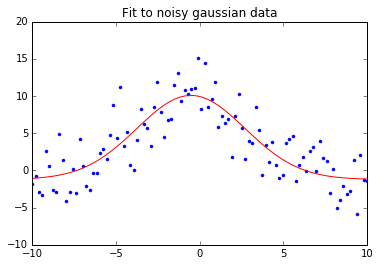

In [22]:
# Definition of the model function
def gaussian_function(x,amp,sigma,x0,offset):
    return amp * np.exp( - (x-x0)**2 / (2*sigma**2) ) + offset

# Generate noisy data
params = [10,3,-0.5,-0.1]
xdata = np.linspace(-10,10,100)
ydata = gaussian_function(xdata,*params) + np.random.normal(loc=0,scale=3,size=xdata.shape)

# Definition of fitting function
def fitfunc(parameters):
    return ydata - gaussian_function(xdata,*parameters)

# Fit data
[params_fit, params_cov, info_dict, message, flag] = leastsq(fitfunc, params, full_output = True)
yfit = gaussian_function(xdata,*params_fit)
    # not an easy way to compute errors

# Display results
plt.plot(xdata,ydata,'.')
plt.plot(xdata,yfit,'r-')
plt.title('Fit to noisy gaussian data')

print('Real values:',params)
print('Fit  values:',params_fit)

## scipy.optimize.least_squares
> outputs = scipy.optimize.least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1.5e-08, xtol=1.5e-08, gtol=1.5e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})

# Curve Fitting (Global Minimizer)

## scipy.optimize.basinhopping

## scipy.optimize.brute

# Surface Fitting (Local Minimizer)

## scipy.optimize.least_squares

In [1]:
from scipy.optimize import least_squares

In [148]:
def surface_fit(*args, **kwargs):
    # Get kwargs
    fun = kwargs.get('fun',None)
    guess = kwargs.get('guess',None)
    disp = kwargs.get('disp',0)
    if fun is None or guess is None: raise TypeError("surface_fit: Must provide kwargs fun and guess")
    # Get x,y,z,using from inputs
    if len(args) is 0:
        return None
    elif len(args) <= 2:
        z = args[0]
        using = np.ones_like(z, dtype=np.bool) if len(args) is 1 else args[1].astype(np.bool)
        x, y = np.meshgrid(np.arange(z.shape[1]), np.arange(z.shape[0]))
    elif len(args) <= 4:
        x, y, z = args[0:3]
        using = np.ones_like(z, dtype=np.bool) if len(args) is 3 else args[3].astype(np.bool)
        if len(x.shape) is 1: x, y = np.meshgrid(x, y)
    else:
        raise ValueError

    # Prepare data for fitting
    x, y, z, using = np.ravel(x), np.ravel(y), np.ravel(z), np.ravel(using)
    using[np.logical_not(np.isfinite(z))] = False

    # fit
    def fitfunc(params):
        return z[using] - fun(x[using], y[using], *params)
    outp = least_squares(fitfunc, guess, verbose=disp)

    return outp

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.7663e+10                                    9.64e+07    
       1              2         4.8168e+10      9.49e+09       1.02e+03       3.44e+07    
       2              4         4.2825e+10      5.34e+09       2.56e+02       2.00e+07    
       3              6         4.0467e+10      2.36e+09       1.28e+02       1.44e+07    
       4              7         3.9236e+10      1.23e+09       1.28e+02       3.97e+07    
       5              8         3.8137e+10      1.10e+09       1.28e+02       2.78e+07    
       6              9         3.7421e+10      7.16e+08       1.28e+02       6.28e+07    
       7             10         3.5998e+10      1.42e+09       1.28e+02       3.17e+07    
       8             11         3.5191e+10      8.06e+08       1.28e+02       5.02e+07    
       9             12         3.4088e+10      1.10e+09       1.28e+02       2.25e+07    

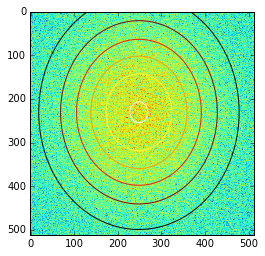

In [154]:
def gaussian_2d(x, y, amp, cenx, ceny, sx, sy, offset):
    return amp * np.exp(-((x-cenx)**2/(2*sx**2)+(y-ceny)**2/(2*sy**2))) + offset
x,y = np.meshgrid(np.arange(512),np.arange(512))
p0 = (1203.1,248.9,230,119.24,139.99,10.9)
z = gaussian_2d(x,y,*p0)
z = z + np.random.normal(scale=500,size=z.shape)
outp = surface_fit(x,y,z,fun=gaussian_2d,guess=(1000,100,100,100,100,100),disp=2)
z_fit = gaussian_2d(x,y,*outp.x)
plt.imshow(z);
plt.contour(z_fit,cmap='hot')
print(p0)
print(outp['x'])

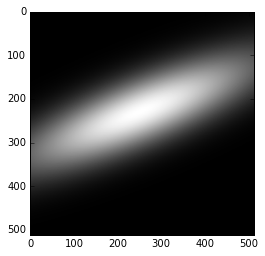

In [167]:
def gaussian_2d(x, y, amp, cenx, ceny, sx, sy, angle, offset):
    x,y = x-cenx, y-ceny
    xp = x*np.cos(angle) - y*np.sin(angle)
    yp = x*np.sin(angle) + y*np.cos(angle)
    sxp, syp = 2*sx**2, 2*sy**2
    return amp * np.exp(-xp**2/sxp - yp**2/syp) + offset

def gaussian_2d(x, y, amp, cenx, ceny, sx, sy, angle, offset):
    return amp * np.exp(- ((x-cenx)*np.cos(angle) - (y-ceny)*np.sin(angle))**2/(2*sx**2) - ((x-cenx)*np.sin(angle) + (y-ceny)*np.cos(angle))**2/(2*sy**2) ) + offset

x,y = np.meshgrid(np.arange(512),np.arange(512))
p0 = (1203.1,248.9,230,200,50,np.pi/8*1,10.9)
z = gaussian_2d(x,y,*p0)
plt.imshow(z,cmap='gray')